<a href="https://colab.research.google.com/github/guilhermecchacur/ProjetoAirbnb/blob/main/Projeto_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto | Analise dos Dados do Airbnb - Amsterdam**

Uma analíse sobre os dados das propriedades anunciadas no Airbnb na cidade de Amsterdam - Holanda. 

Os dados forma obtidos através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), no qual é possivel ter acesso aos dados sobre os anúncios de diversas cidades.

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
#Salvando o arquivo csv em um DataFrame
data = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/visualisations/listings.csv'
df = pd.read_csv(data)

#**Visão Geral dos Dados**

---

Aqui teremos uma visão de como os dados estão sendo apresentados e como eles estão ditribuidos. Essa parte visa obter um conhecimento sobre o material a ser analisado. 

##**Dicionário de variáveis**

---


**id** - Código único do imovel.

**name** - Nome dado ao anúnico do imovel no site.

**host_id** - código único do anfritião.

**host_name** - Nome do anfitrião.

**neighbourhood_group** - Nível 1 de agrupamento dos bairros que os imovéis estão localizados.

**neighbourhood** - Nome do bairro.

**latitude** - Latitude do imóvel.

**longitude** - Longitude do imóvel.

**room_type** - Tipo da acomodação anunciada.

**price** - Preço por noite.

**minimum_nights** - Minimo de noites para reserva.

**number_of_reviews** - Número de avaliações.

**last_review** - Data da última avaliação.

**reviews_per_month** - Número de avaliações por mês.

**calculated_host_listing_count** - Numero de aúncios do mesmo anfritião.

**availability_365** - Número de dias disponíveis em 365 dias.


In [ ]:
#Exibir as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,279,2019-11-21,2.88,1,132
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,106,1,339,2020-03-27,3.68,2,0
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,100,14,5,2020-01-02,0.12,1,57
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,221,2020-07-25,2.14,1,182
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,343,2020-02-06,4.53,2,295


In [ ]:
#Exibir os tipos de dados do DataFrame
display(df.dtypes)
print('\n')

#Verificar a quantidade de entradas e de variáveis do dataset
entradas = df.shape[0]
variaveis = df.shape[1]
print(f"Entradas:\t{entradas}")
print(f"Variáveis:\t{variaveis}")

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object



Entradas:	16478
Variáveis:	16


* Olhando o tipo de dado para cada variável, já podemos indentificar que a variável `last_review` está como uma string, mas o seu conteúdo é relacionado a uma data. Dessa forma, devemos conveter o seu tipo para uma datetime, caso seja preciso usá-la.

In [ ]:
#Verificar a porcentagem de valores nulos de cada variável
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.137092
last_review                       0.137092
host_name                         0.003338
name                              0.001881
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* Com os valores nulos, podemos ver que a variável `neighbourhood_group` contém todos os valores nulos, e por isso vamos excluí-la do dataset. As outras colunas com valores nulos, estão com uma porcentagem baixa, significa que para esse tipo de análise não será um problema.

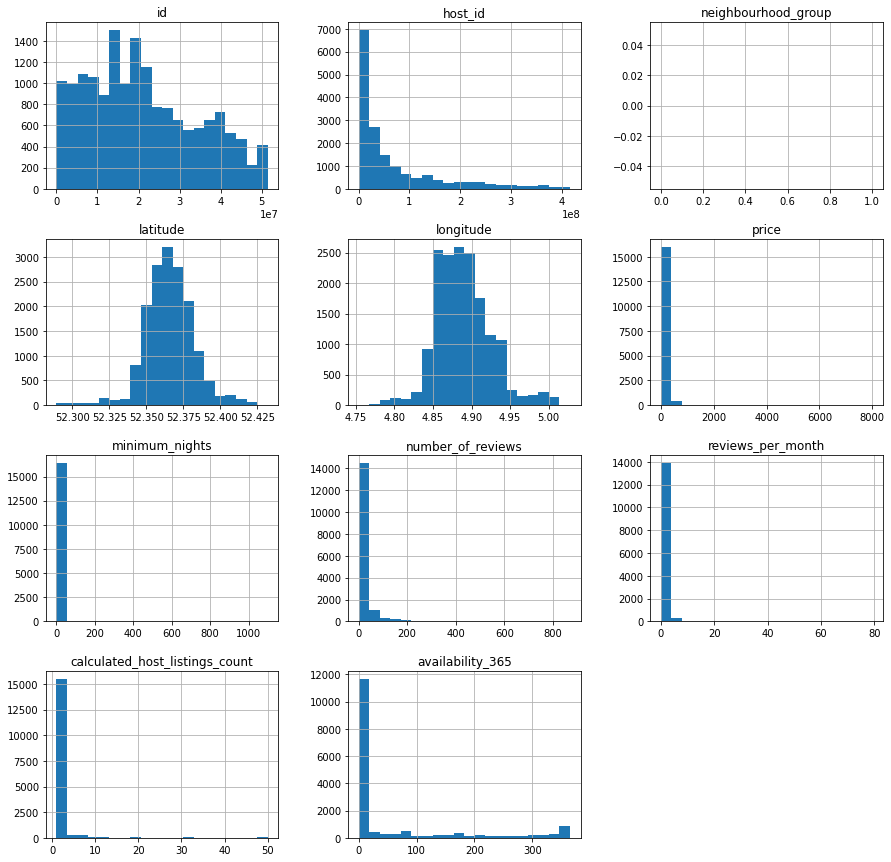

In [ ]:
#Plotando um histograma para ver a distribuição das variáveis quantitativas
df.hist(bins=20, figsize=(15,15));

* Com o histograma, podemos já ter uma ideia se há outliers. Por exemplo, a variável `minimum_nights` etá mostrando o eixo x acima de 1000, que podemos considerar alguma entrada com outlier. A coluna `reviews_per_month` também parece ter algumas entradas com outlier, por há casos com mais de 60 reviews em um mês só, que seria o caso de mais reviews do que a quantidade máxima de pessoas diferentes que podem alugar a acomodação.

In [ ]:
#Exibindo a análise descritiva das variáveis 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16478.000000,16478.000000,16478.000000,14219.000000,16478.000000,16478.000000
mean,156.873225,3.934337,24.295181,0.636915,1.768418,57.931484
std,173.111294,19.445875,56.040299,1.410119,3.544618,110.056511
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,96.000000,2.000000,2.000000,0.110000,1.000000,0.000000
50%,130.000000,2.000000,8.000000,0.270000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.610000,1.000000,54.000000
max,8000.000000,1100.000000,871.000000,79.290000,50.000000,365.000000


* Com a análise descritiva das variáveis, podemos reforçar a ideia de outliers já vista no histograma. 

* Abaixo fazemos a limpeza desse outliers e das variáveis que não nos serão necessárias. E assim, é criado um novo DataFrame mais "limpo".

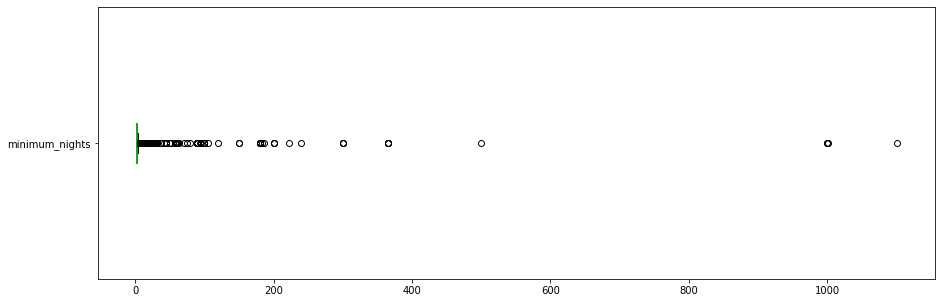



Entradas acima de 25: 182
Porcentagem de entradas acima de 25: 1.1045%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,5));
plt.show()

print('\n')
out = 25
print(f"Entradas acima de {out}: {len(df[df.minimum_nights > out])}")
print(f"Porcentagem de entradas acima de {out}: {(len(df[df.minimum_nights > out]) / df.shape[0])*100:.4f}%")

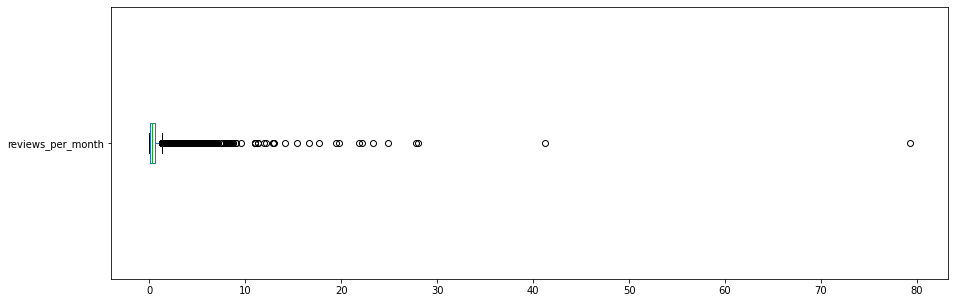



Entradas acima de 25: 2
Porcentagem de entradas acima de 25: 0.0121%


In [ ]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,5));
plt.show()

print('\n')
out_reviews = 30
print(f"Entradas acima de {out}: {len(df[df.reviews_per_month > out_reviews])}")
print(f"Porcentagem de entradas acima de {out}: {(len(df[df.reviews_per_month > out_reviews]) / df.shape[0])*100:.4f}%")

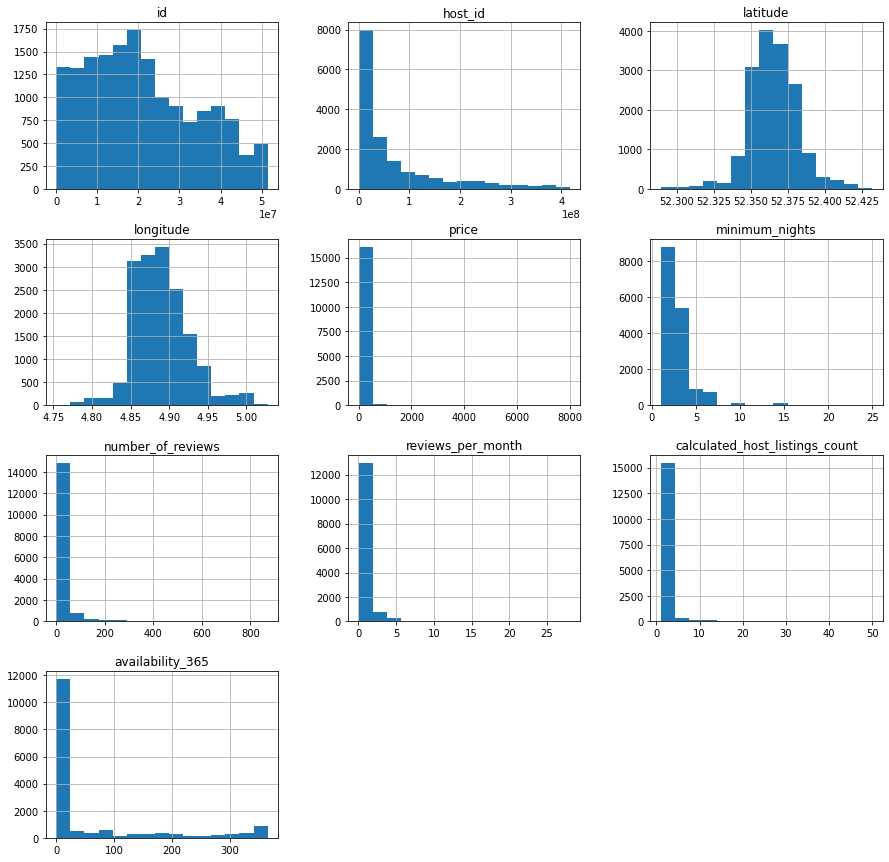

In [ ]:
df2 = df.copy()
df2.drop(df2[df2.minimum_nights > 25].index, axis=0, inplace=True)
df2.drop(df2[df2.reviews_per_month >30].index, axis=0, inplace=True)
df2.drop(columns=("neighbourhood_group"),inplace=True)

df2.hist(bins=15, figsize=(15,15));


#**Análise dos Dados e Variáveis**

---


In [ ]:
print(f"Média de preços: {(df2.price.std()):.2f}")

Média de preços: 158.71


* Com o DataFrame limpo, podemos ver a média de preço por noite do dataset. A média não está muito distante da mediana, que nos dá sinal de que não é uma variável muito disperça. Apesar do valor máximo ser 8000, parece haver poucas acomodações nessa faixa de preço.

* A correleção mostra quais as varáveis que caminham juntas, tanto em sentidos iguais ou contrários. É exibido uma matriz com esses coeficiente de correlação e uma heatmap a partir dessa matriz. 

In [ ]:
#Exibindo a matriz de correlação
corr = df2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.013346,-0.069854,-0.073990,0.005761,0.112887
minimum_nights,0.013346,1.000000,-0.094321,-0.131564,-0.027314,-0.041529
number_of_reviews,-0.069854,-0.094321,1.000000,0.712464,-0.002067,0.254833
reviews_per_month,-0.073990,-0.131564,0.712464,1.000000,0.064049,0.324087
calculated_host_listings_count,0.005761,-0.027314,-0.002067,0.064049,1.000000,0.122711
availability_365,0.112887,-0.041529,0.254833,0.324087,0.122711,1.000000


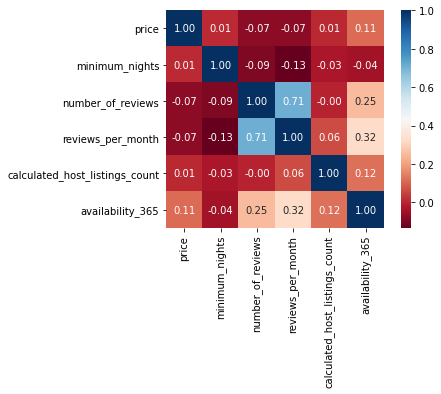

In [ ]:
#Plotando o heatmap da matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
df2.room_type.value_counts()

Entire home/apt    12691
Private room        3450
Hotel room           110
Shared room           43
Name: room_type, dtype: int64

In [ ]:
df2.room_type.value_counts() / df2.shape[0]

Entire home/apt    0.778876
Private room       0.211734
Hotel room         0.006751
Shared room        0.002639
Name: room_type, dtype: float64

In [ ]:
df2.groupby(by=['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
Centrum-Oost                              192.929395
Centrum-West                              187.791619
IJburg - Zeeburgereiland                  177.984925
Zuid                                      171.473865
Oud-Noord                                 159.267420
De Pijp - Rivierenbuurt                   159.082831
Watergraafsmeer                           154.323276
Oud-Oost                                  152.027077
Westerpark                                149.925203
De Baarsjes - Oud-West                    146.906823
Buitenveldert - Zuidas                    142.220779
Geuzenveld - Slotermeer                   140.565657
De Aker - Nieuw Sloten                    140.137931
Noord-Oost                                131.902542
Oostelijk Havengebied - Indische Buurt    131.758530
Noord-West                                129.402402
Bos en Lommer                             124.978701
Slotervaart                               117.571823
Osdorp                          

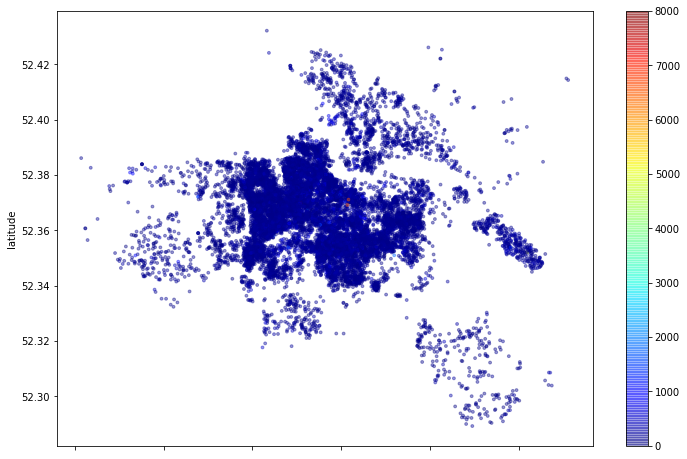

In [ ]:
df2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
print(f'Média de noites mínimas: {df2.minimum_nights.mean():.2f}')

Média de noites mínimas: 2.93


#**Conclusão**

----

Com o dataset apresentado foi possível enteder um pouco como estão organizados e distribuidos os anúncios na cidade. Foi possível localizar e identificar alguns outliers que poderiam prejudiar alguma análise mais aprofundada. E, também, foi possível identificas as áreas mais caras, média de algumas variáveis se há alguma correlação entre elas.
